# Capstone Project

**Goal:
The goal is to complete the tasks below based off the 538 article and see if I reach a similar conclusion. It will need pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Scatterplot showing the relationship between rating and votes:**

<Axes: xlabel='RATING', ylabel='VOTES'>

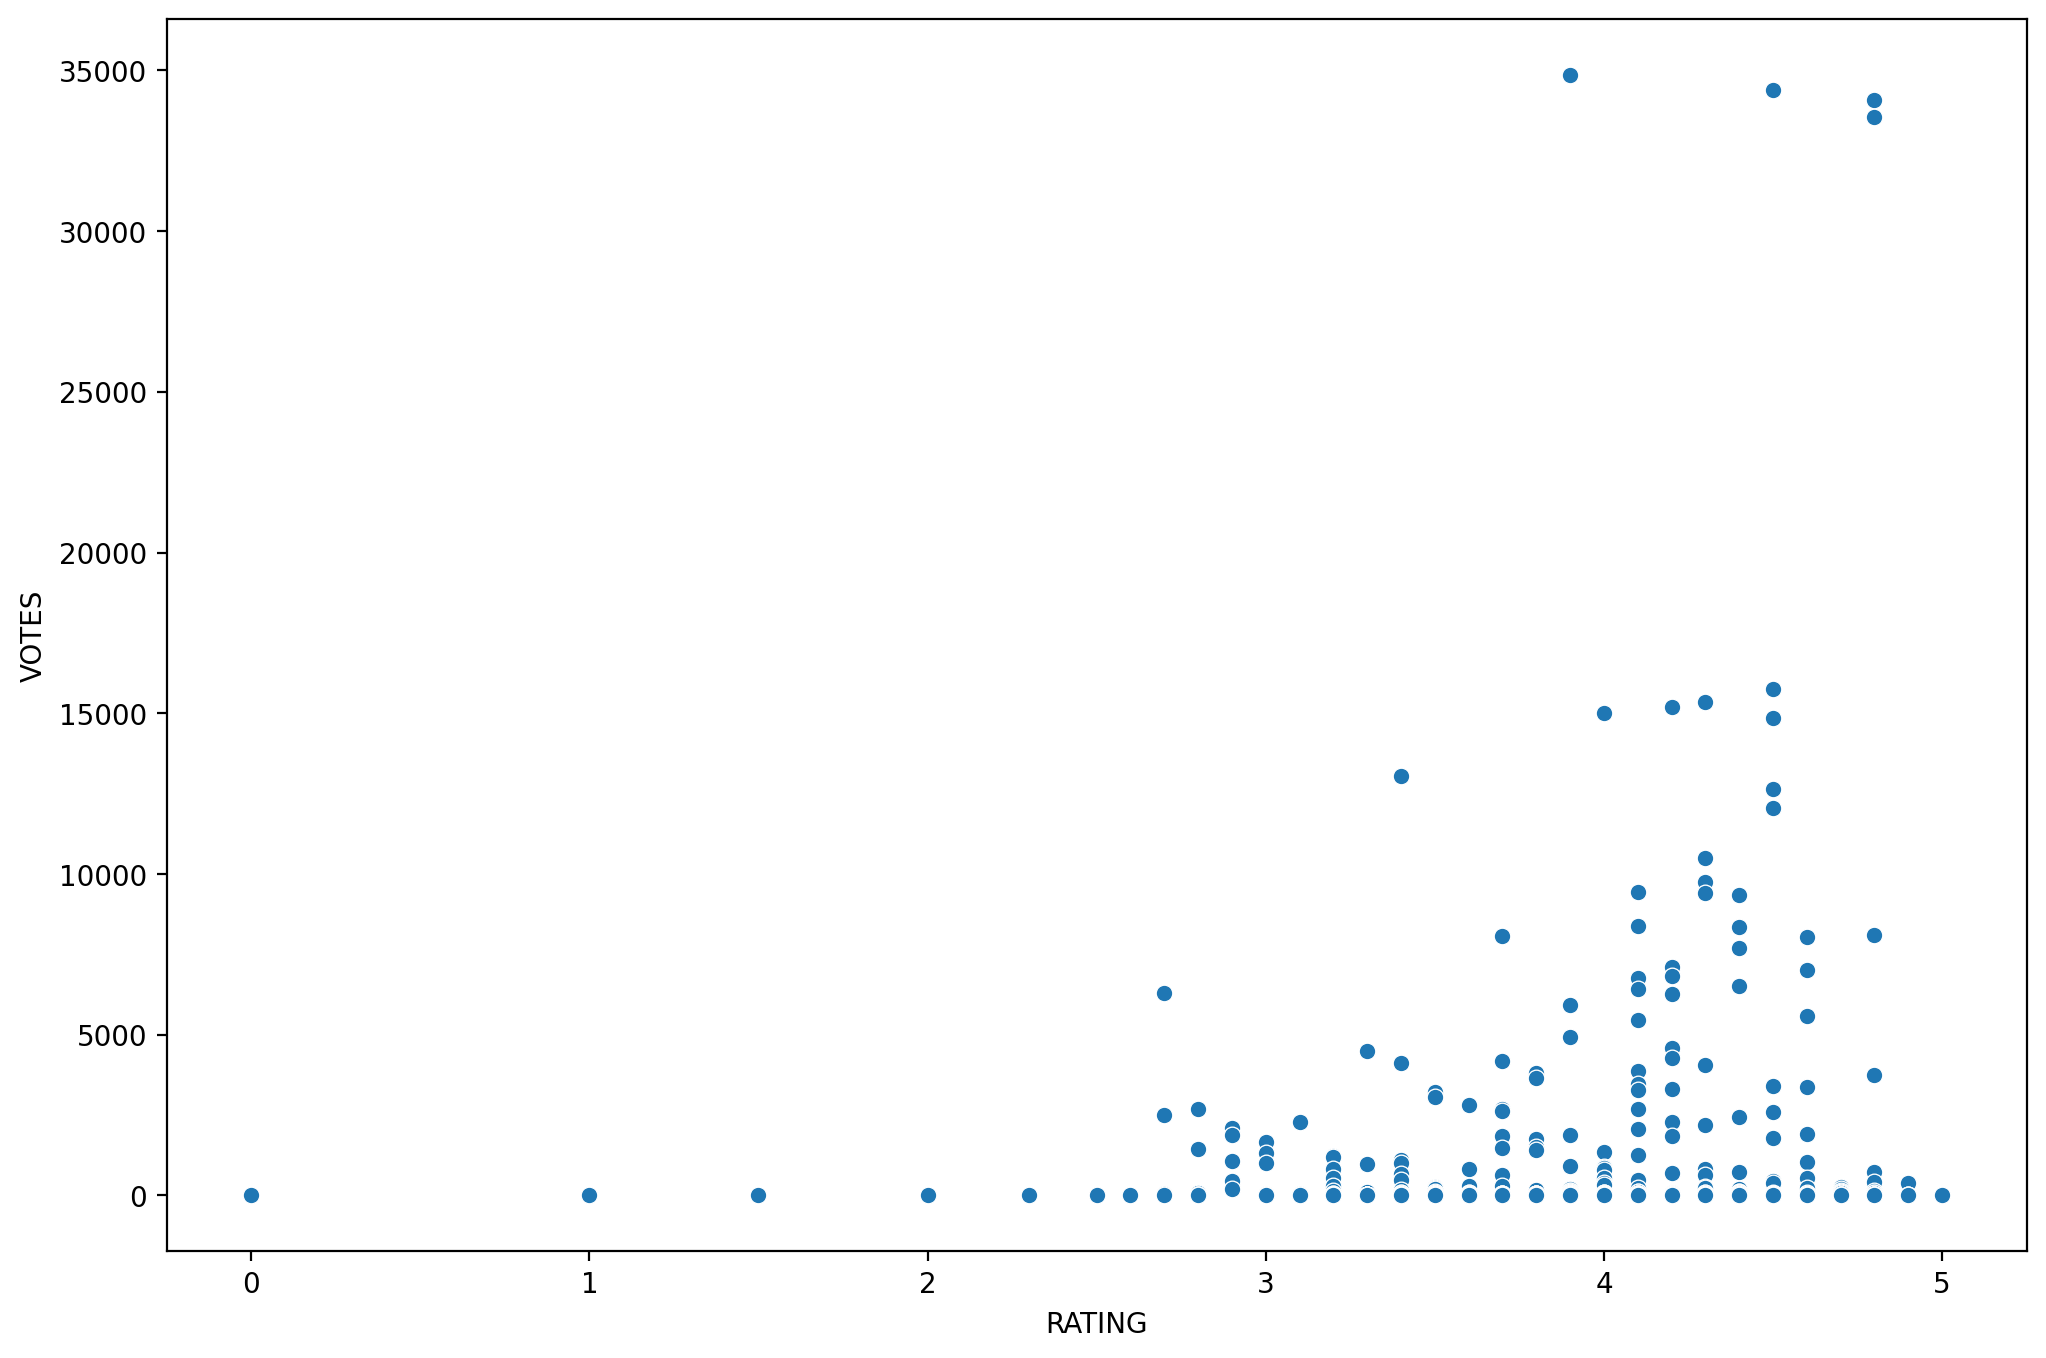

In [6]:
plt.figure(figsize=(12,8),dpi = 200)
sns.scatterplot(data = fandango, x = 'RATING', y = 'VOTES')

In [7]:
fandango.corr()

/var/folders/_y/kz5jk2zn3031sxh_gjb5jsdm0000gn/T/ipykernel_18039/1316820973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Create a new column that is able to strip the year from the title strings and set this new column as YEAR:**

In [8]:
fandango['Year'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].rstrip(')'))


**How many movies are in the Fandango DataFrame per year?**

In [9]:
fandango['Year'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: Year, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

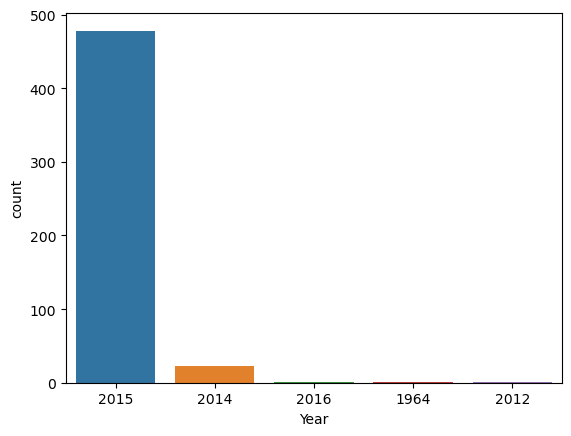

In [10]:
sns.countplot(data = fandango, x = 'Year' )

**What are the 10 movies with the highest number of votes?**

In [11]:
fandango.sort_values(by='VOTES', ascending=False)[:10]


,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**How many movies have zero votes?**

In [12]:
fandango.sort_values(by='VOTES', ascending=True)[:10]


,FILM,STARS,RATING,VOTES,Year
503,Zarafa (2012),0.0,0.0,0,2012
465,Le gaucher (2015),0.0,0.0,0,2015
464,La passion d'Augustine (2015),0.0,0.0,0,2015
463,La leon (2015),0.0,0.0,0,2015
462,La face cache de Margo (2015),0.0,0.0,0,2015
461,Journey to Space 3D (2015),0.0,0.0,0,2015
460,Jilebi (2015),0.0,0.0,0,2015
459,Insanity (2015),0.0,0.0,0,2015
458,How to Change the World (2015),0.0,0.0,0,2015
457,Gun & Goal (2015),0.0,0.0,0,2015


In [13]:
no_votes = fandango['VOTES']==0
no_votes.sum() 

69

**DataFrame of only reviewed films by removing any films that have zero votes.**

In [14]:
fan_reviewed = fandango[fandango['VOTES']>0]

**A KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING):**

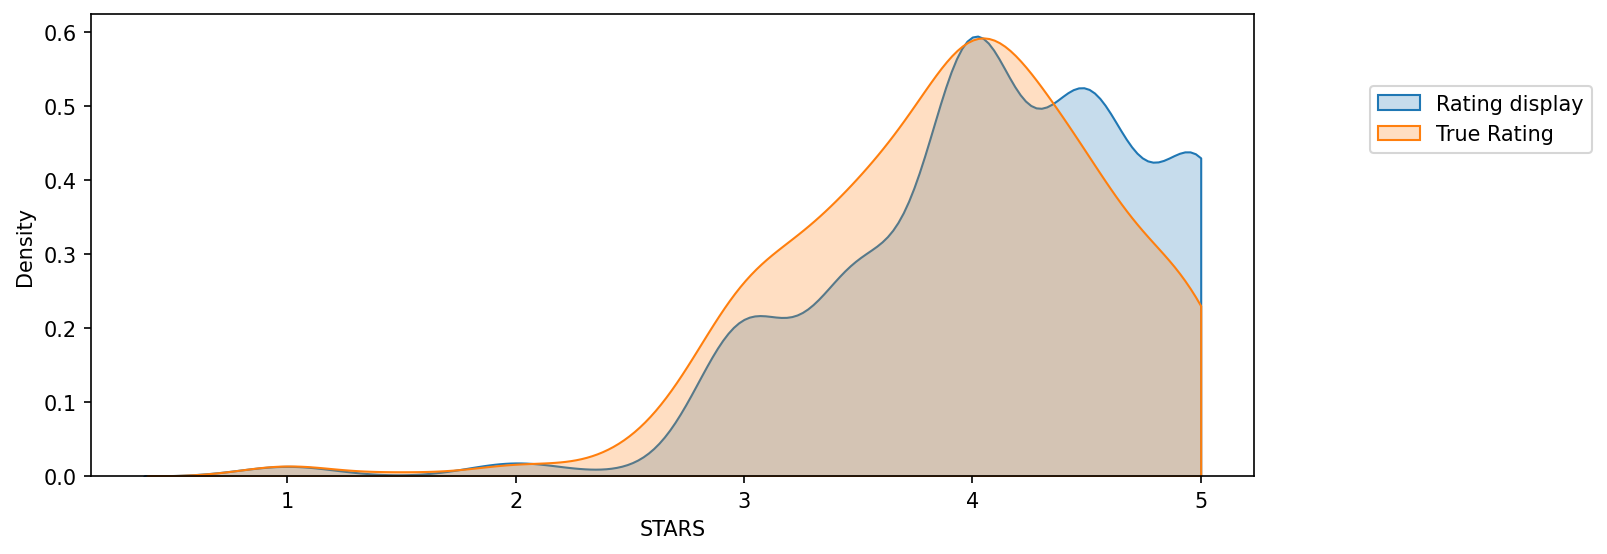

In [15]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data = fan_reviewed, x ='STARS',clip = [0,5] , fill = True,label='Rating display')
sns.kdeplot(data = fan_reviewed, x ='RATING',clip = [0,5], fill = True ,label='True Rating')
plt.legend(loc=(1.1,0.7))

**Create a new column of the different between STARS displayed versus true RATING.**

In [16]:
fan_reviewed['discrepancy'] = fan_reviewed['STARS']- fan_reviewed['RATING']
fan_reviewed['discrepancy']=fan_reviewed['discrepancy'].round(2)

/var/folders/_y/kz5jk2zn3031sxh_gjb5jsdm0000gn/T/ipykernel_18039/4001844795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['discrepancy'] = fan_reviewed['STARS']- fan_reviewed['RATING']
/var/folders/_y/kz5jk2zn3031sxh_gjb5jsdm0000gn/T/ipykernel_18039/4001844795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['discrepancy']=fan_reviewed['discrepancy'].round(2)


In [17]:
fan_reviewed

,FILM,STARS,RATING,VOTES,Year,discrepancy
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Create a count plot to display the number of times a certain difference occurs:**

<Axes: xlabel='discrepancy', ylabel='count'>

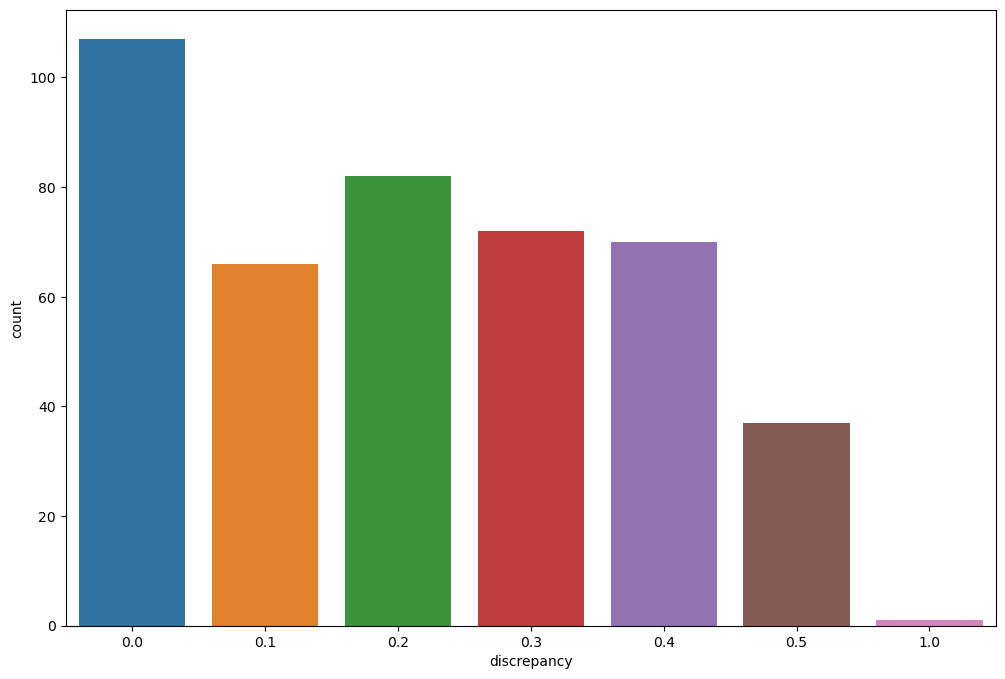

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(data = fan_reviewed, x = 'discrepancy')

In [19]:
fan_reviewed[fan_reviewed['discrepancy']==1]

,FILM,STARS,RATING,VOTES,Year,discrepancy
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# Comparison of fandango ratings to Other Sites

In [20]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [21]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [22]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [23]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


**A scatterplot exploring the relationship between RT Critic reviews and RT User reviews:**

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

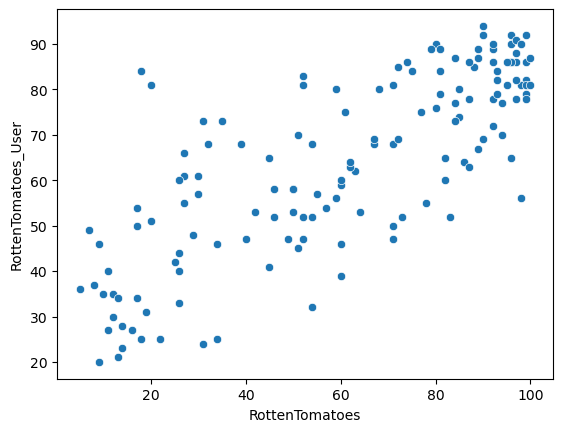

In [25]:
sns.scatterplot(data= all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')

**A new column based off the difference between critics ratings and users ratings for Rotten Tomatoes:**

In [26]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

**Mean Absolute Difference between RT scores and RT User scores:**

In [27]:
MAE = all_sites['Rotten_Diff'].apply(abs).mean()
MAE

15.095890410958905

**Plot the distribution of the differences between RT Critics Score and RT User Score:**

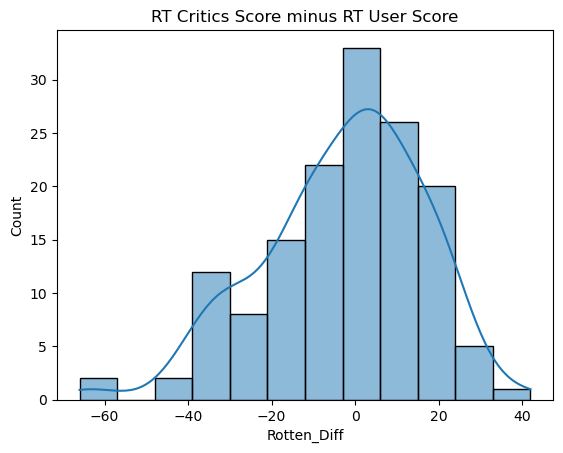

In [28]:
sns.histplot(data= all_sites, x= 'Rotten_Diff', kde = True)
plt.title("RT Critics Score minus RT User Score");

**Top 5 movies users rated higher than critics on average:**

In [29]:
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**Top 5 movies critics scores higher than users on average:**

In [30]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


**Scatterplot of the Metacritic Rating versus the Metacritic User rating:**

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

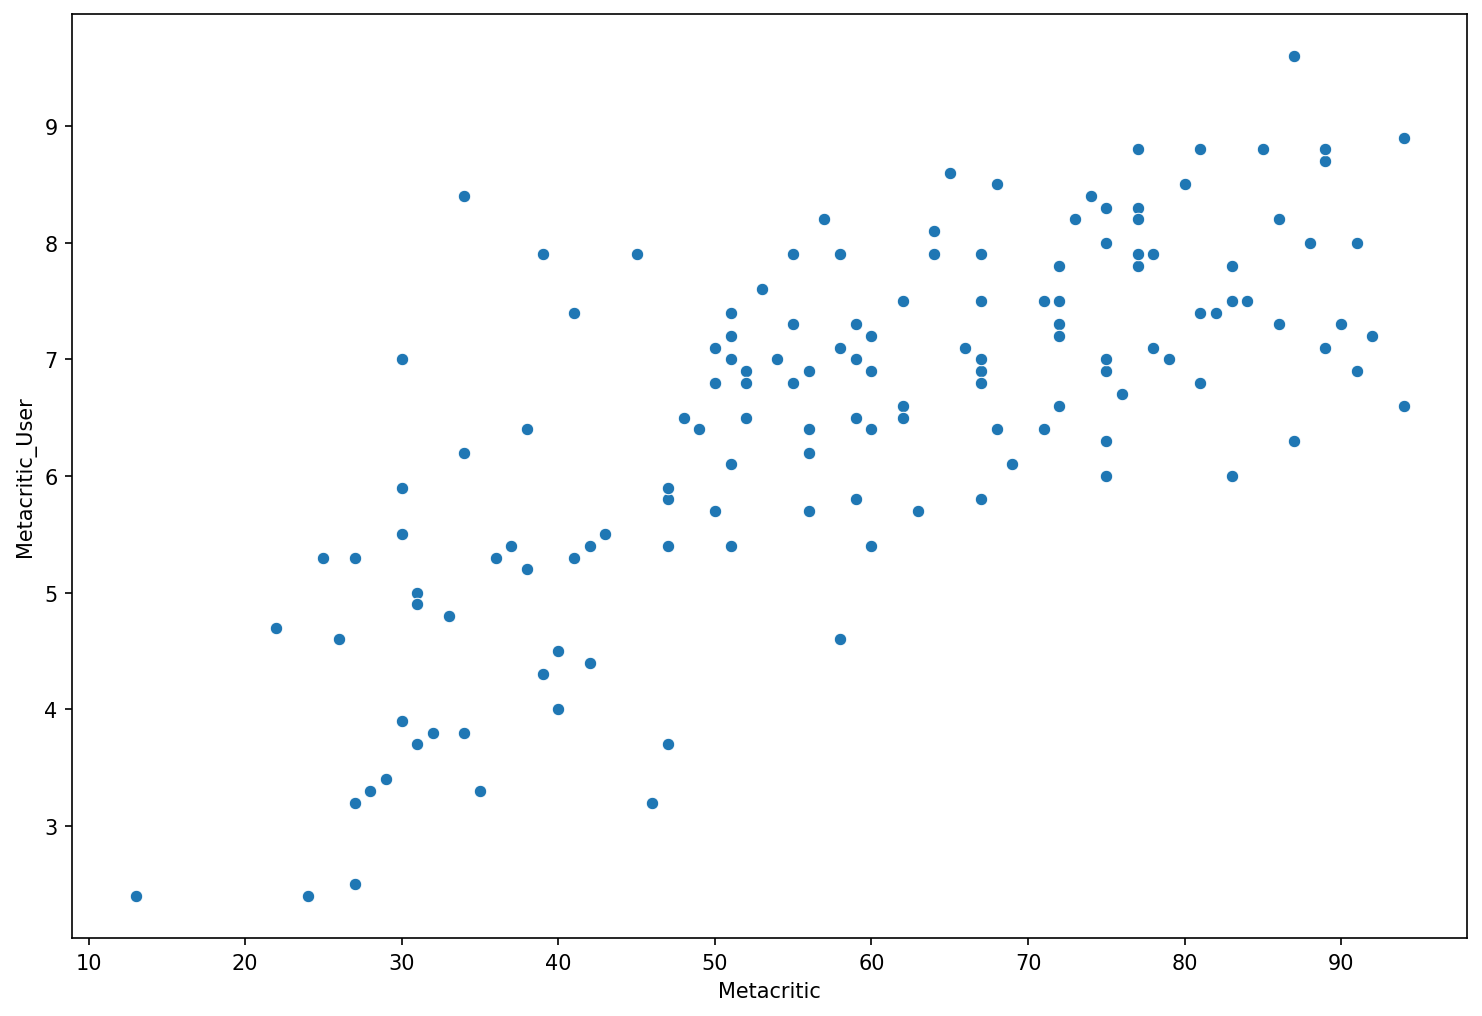

In [31]:
plt.figure(figsize=(12,8),dpi = 150)
sns.scatterplot(data = all_sites, x = 'Metacritic',y = 'Metacritic_User')

**Scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB:**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

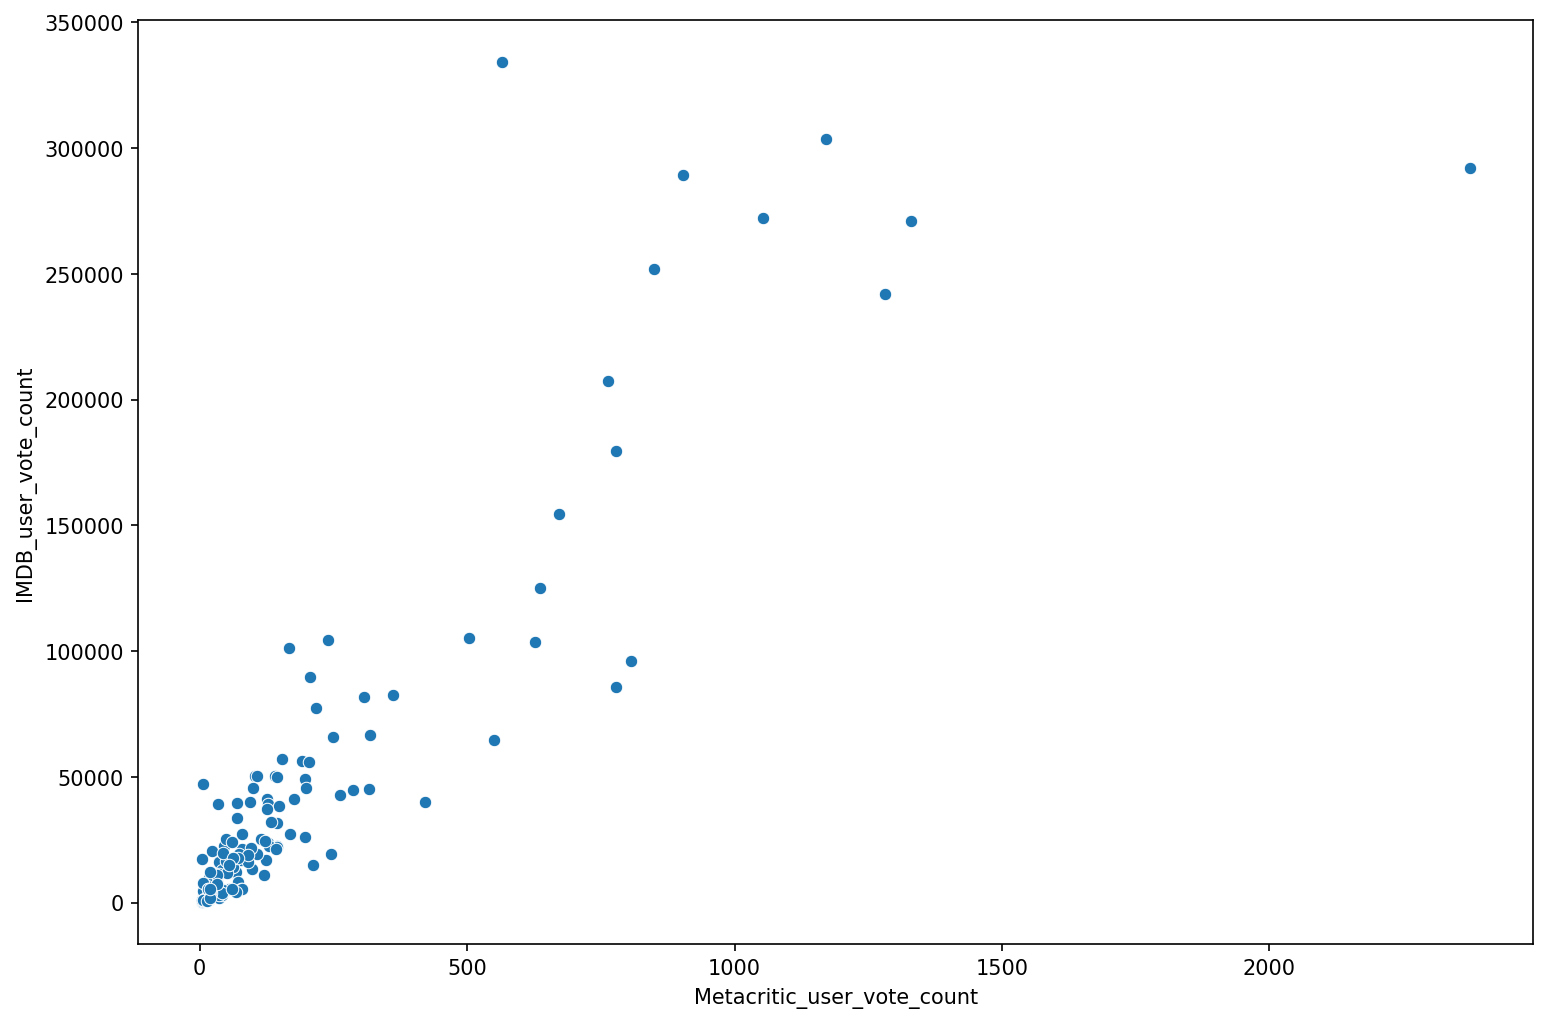

In [32]:
plt.figure(figsize=(12,8),dpi = 150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**The movie with the highest IMDB user vote count:**

In [33]:
all_sites.sort_values('IMDB_user_vote_count',ascending = False)[:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**The movie with the highest Metacritic User Vote count:**

In [34]:
all_sites.sort_values('Metacritic_user_vote_count',ascending = False)[:1]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [35]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [36]:
df.head()

,FILM,STARS,RATING,VOTES,Year,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


**Normalize columns to Fandango STARS and RATINGS 0-5:**

In [37]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [38]:
df.head()

,FILM,STARS,RATING,VOTES,Year,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Norm_scores DataFrame that only contains the normalizes ratings:**

In [39]:
df1 = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [40]:
df1

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


**Comparing Distribution of Scores Across Sites:**

/var/folders/_y/kz5jk2zn3031sxh_gjb5jsdm0000gn/T/ipykernel_18039/1631362978.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1 ,clip=[0,5],shade=True,palette='Set1')


<Axes: ylabel='Density'>

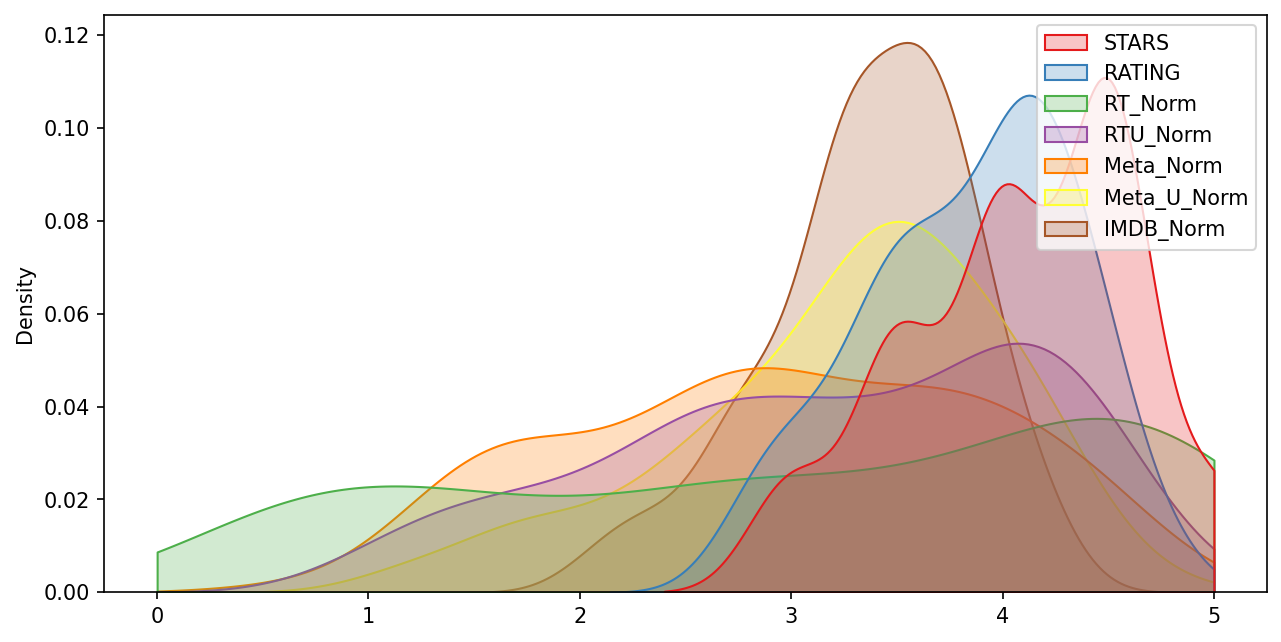

In [41]:
plt.figure(figsize=(10,5), dpi = 150)
sns.kdeplot(data=df1 ,clip=[0,5],shade=True,palette='Set1')


**KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango:**

/var/folders/_y/kz5jk2zn3031sxh_gjb5jsdm0000gn/T/ipykernel_6658/2381962271.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df1[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1')


<Axes: ylabel='Density'>

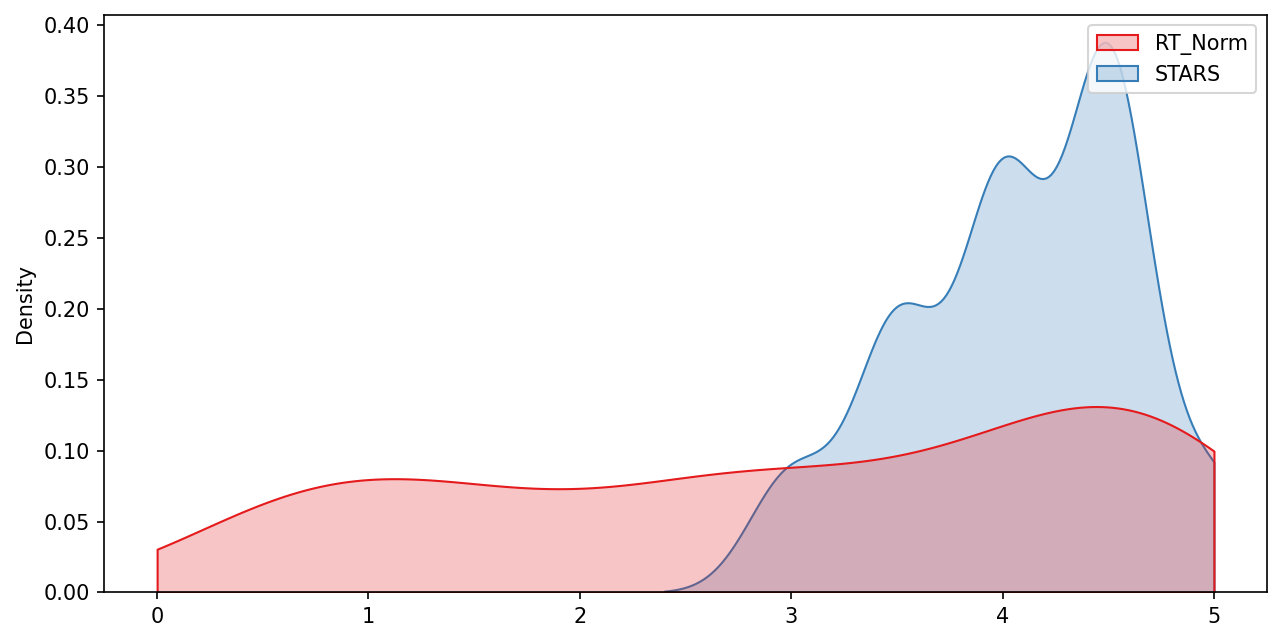

In [178]:
plt.figure(figsize=(10,5), dpi = 150)
sns.kdeplot(data = df1[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1')

**A histplot comparing all normalized scores:**

<Axes: ylabel='Count'>

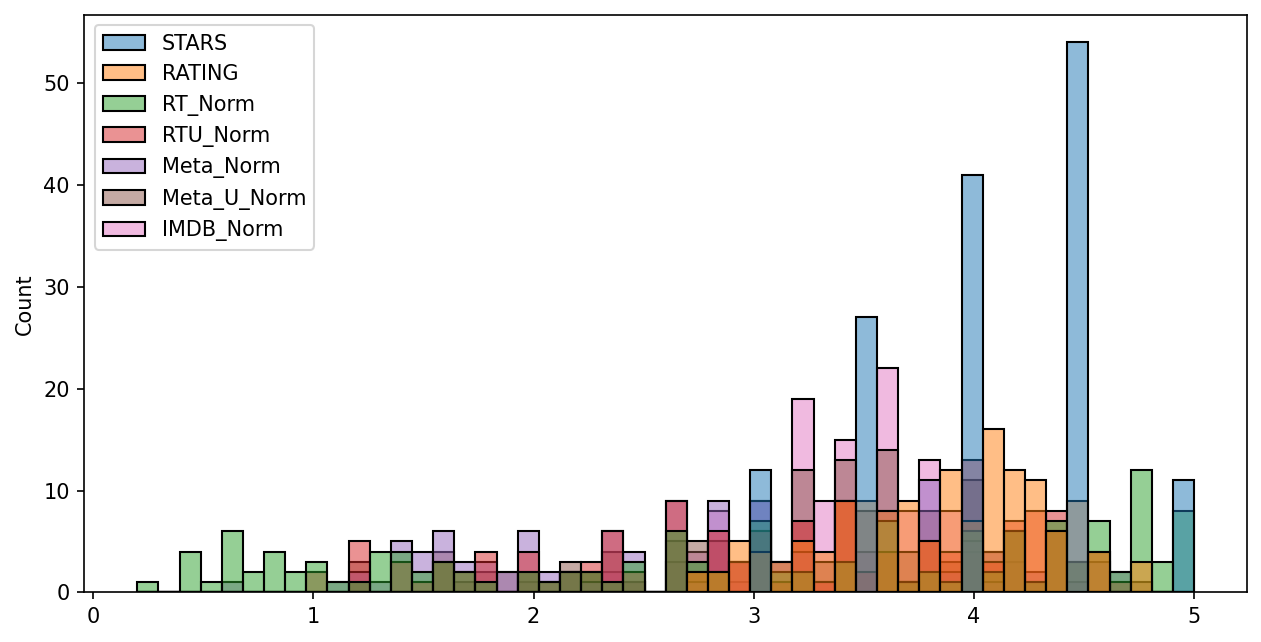

In [42]:
plt.figure(figsize=(10,5), dpi = 150)
sns.histplot(data = df1, bins=50)

**A clustermap visualization of all normalized scores:**

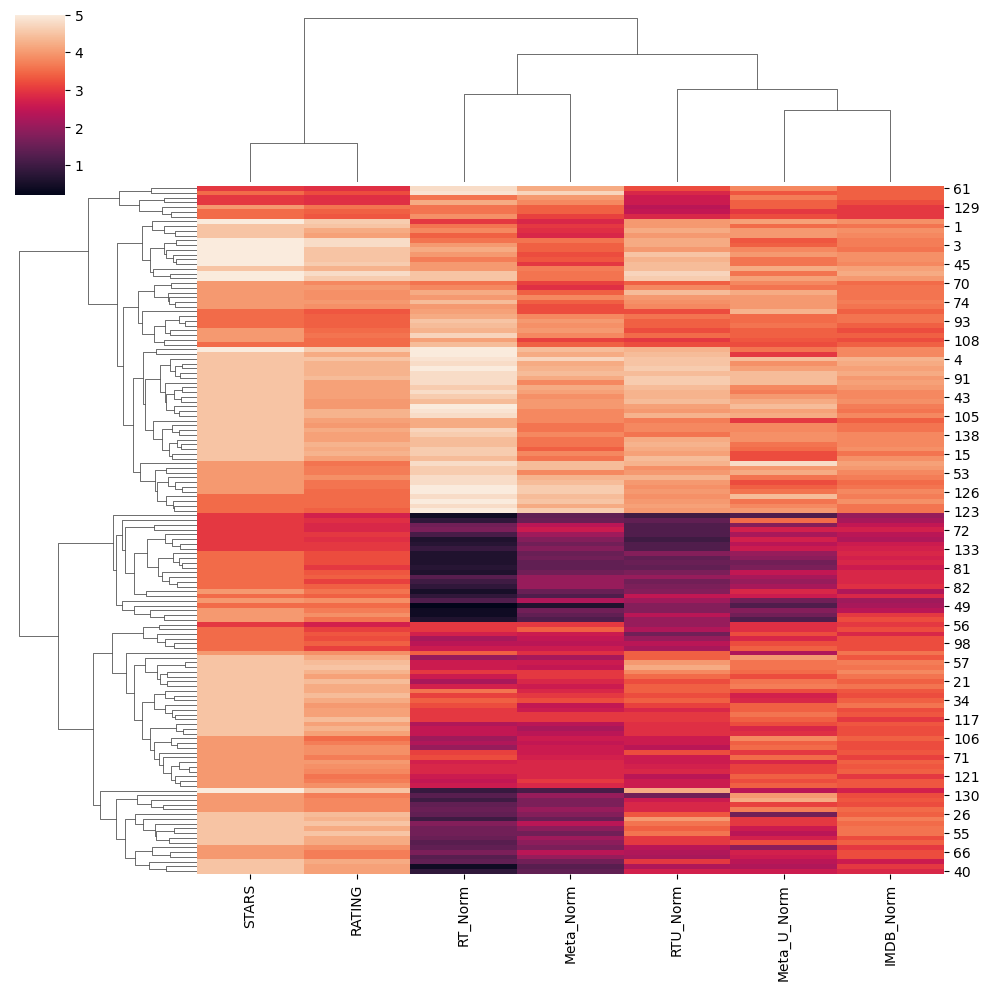

In [43]:
sns.clustermap(data = df1)

**Clearly Fandango is rating movies much higher than other sites,top 10 worst movies based off the Rotten Tomatoes Critic Ratings:**

In [44]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [45]:
norm_films.sort_values('RT_Norm',ascending = True)[:10]

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
109,3.0,2.9,0.6,1.0,1.8,2.7,2.3,The Vatican Tapes (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)


In [193]:
0.4+2.3+1.3+2.3+3

9.3

In [194]:
9.3/5

1.86

**Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, Taken 3!. Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms!**